In [383]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

- X: Firmicutes
- Y: Bacteroidetes

In [384]:
α1 = 0.051 # Tasa de crecimiento
α2 = 0.089 # Tasa de crecimiento
α3 = 0.1   # Tasa de crecimiento

β1 = 0.0001 # Como afecta el crecimiento
β2 = 0.001  # Como afecta el crecimiento
β3 = 0.01   # Como afecta el crecimiento

k1 = 200    # Capacidad de carga
k2 = 200    # Capacidad de carga
k3 = 300    # Capacidad de carga

ε = 6       # Tasa de eliminación mg/h
ε1 = 0.3    # Como afecta el antibiótico a x
ε2 = 0.3    # Cómo afecta el antibiótico a y

x0 = 150     # X inicial
y0 = 100     # Y inicial
z0 = 1      # Z inicial
A0 = 10     # Antibiótico inicial

t0 = 8     # Cada cuando se suministra una dosis
n = 40      # Número de dosis suministradas cada t0


In [385]:
def model_1_bact_firm(c, t):
    x=c[0] # Firmicutes
    y=c[1] # Bacteroidetes 
    dxdt = α1*x*(1-(x/k1)) + β1*x*y
    dydt = α2*y*(1-(y/k2)) + β2*x*y
    return np.array([dxdt,dydt])

tmax = 1000
dt = 0.1
t = np.arange(0,tmax,dt)

c0 = np.array([x0 , y0])

solution = odeint(model_1_bact_firm, c0, t)

In [386]:
x1 = solution[tmax, 0]
y1 = solution[tmax, 1]

R = x1/y1
print(R)

0.4284121143117278


<!-- def LV(X,t):
    x = X[0] # Presas
    y = X[1] # Predadores
    dxdt = a*x*(1-x/K) - b*x*y
    dydt = c*x*y - d*y
    dX = [dxdt, dydt]
    return dX

# Condiciones Iniciales
x0 = 10 # En miles
y0 = 2 # En miles
ICS = [x0, y0]

# Parámetros
a = 0.8
b = 0.4
c = 0.15
d = 0.6
K = 10 -->

Text(0, 0.5, 'Bacterias')

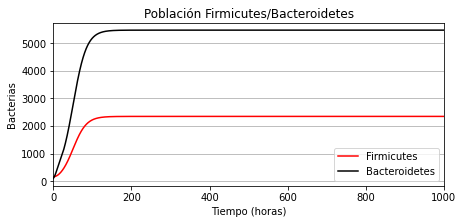

In [387]:
fig, ax = plt.subplots(figsize=(7, 3)) # Best to paper
plt.plot(t, solution[:,0], color='red', label='Firmicutes')
plt.plot(t, solution[:,1], color='black', label='Bacteroidetes')
plt.legend(loc='best')
plt.xlim(0, tmax)
plt.grid(True, axis='y')
plt.title('Población Firmicutes/Bacteroidetes')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Bacterias')
# plt.savefig('Dialisis_toxina.eps', dpi=400, bbox_inches = "tight")

In [388]:
def model_3_bact_firm_ab(c, t):
    x=c[0] # Firmicutes
    y=c[1] # Bacteroidetes 
    z=c[2] # Antibiótico
    dxdt = α1*x*(1-(x/k1)) + β1*x*y -ε1*x*z
    dydt = α2*y*(1-(y/k2)) + β2*x*y -ε2*y*z
    dzdt = -ε * z
    return np.array([dxdt,dydt, dzdt])

tmax = 100
dt = 0.1
t = np.arange(0,tmax,dt)

dosis_desc = 14 # Día en el que se suministra antibiótico

c0 = np.array([x0 , y0, A0])

solution_AB = odeint(model_3_bact_firm_ab, c0, t)

dosis_arr_2 = np.array([np.arange(i*t0, (i*t0) + t0, dt) for i in range(n)])

t = np.arange(0, t0, dt)
ysol = []

for i in range(len(dosis_arr_2)):
    ysol.append(odeint(model_3_bact_firm_ab, c0, dosis_arr_2[i]))
    c0 = np.array([ysol[-1][-1][0], ysol[-1][-1][1], 0])

    if i >= dosis_desc:
        c0 = np.array([ysol[-1][-1][0], ysol[-1][-1][1], A0 + ysol[-1][-1][2]])

t = np.concatenate(dosis_arr_2)
x = np.concatenate(ysol)[ : ,0]
y = np.concatenate(ysol)[ : ,1]
z = np.concatenate(ysol)[ : ,1]


Text(0, 0.5, 'Bacterias')

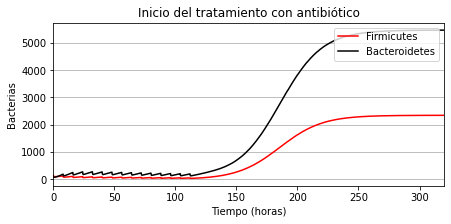

In [394]:
fig, ax = plt.subplots(figsize=(7, 3)) # Best to paper
plt.plot(t, x, color='red', label='Firmicutes')
plt.plot(t, y, color='black', label='Bacteroidetes')
# plt.plot(t, z, color='blue', label='Otra chimbada por ahí')
plt.legend(loc=1)
plt.xlim(0, t0*n)
plt.grid(True, axis='y')
plt.title('Inicio del tratamiento con antibiótico')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Bacterias')
# plt.savefig('Dialisis_toxina.eps', dpi=400, bbox_inches = "tight")

In [390]:
tmax = 100
dt = 0.1
t = np.arange(0,tmax,dt)

dosis_desc = 14 # Día en el que se suministra antibiótico

c0 = np.array([x0 , y0, A0])

solution_AB = odeint(model_3_bact_firm_ab, c0, t)

dosis_arr_2 = np.array([np.arange(i*t0, (i*t0) + t0, dt) for i in range(n)])

t = np.arange(0, t0, dt)
ysol = []

for i in range(len(dosis_arr_2)):
    ysol.append(odeint(model_3_bact_firm_ab, c0, dosis_arr_2[i]))
    c0 = np.array([ysol[-1][-1][0], ysol[-1][-1][1], A0 + ysol[-1][-1][2]])

    if i >= dosis_desc:
        c0 = np.array([ysol[-1][-1][0], ysol[-1][-1][1], 0])
        
        

t = np.concatenate(dosis_arr_2)
x = np.concatenate(ysol)[ : ,0]
y = np.concatenate(ysol)[ : ,1]
z = np.concatenate(ysol)[ : ,1]

Text(0, 0.5, 'Bacterias')

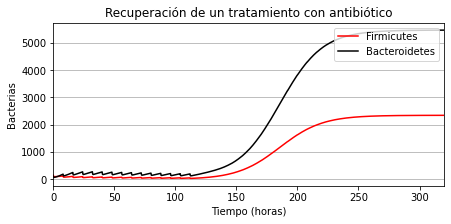

In [391]:
fig, ax = plt.subplots(figsize=(7, 3)) # Best to paper
plt.plot(t, x, color='red', label='Firmicutes')
plt.plot(t, y, color='black', label='Bacteroidetes')
plt.legend(loc=1)
plt.xlim(0, t0*n)
plt.grid(True, axis='y')
plt.title('Recuperación de un tratamiento con antibiótico')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Bacterias')

In [392]:
# def model_2_bact_firm(c, t):
#     x = c[0] # Firmicutes
#     y = c[1] # Bacteroidetes 
#     z = c[2] # Otros
#     dxdt = (1 - x/k1)*α1*x + (y*β1 + z*β3)*x
#     dydt = y*(-y/k2 + 1)*α2 + y*(z*β3 + β1*x)
#     dzdt = z*(y*β2 + β1*x) + z*(-z/k3 + 1)*α3
#     return np.array([dxdt,dydt, dzdt])

# tmax = 100
# dt = 0.1
# t=np.arange(0,tmax,dt)

# c0 = np.array([x0 , y0, z0])

# solution = odeint(model_2_bact_firm, c0, t)

In [393]:
# fig, ax = plt.subplots(figsize=(15, 5))
# plt.plot(t, solution[:,0], color='red', label='Firmicutes')
# plt.plot(t, solution[:,1], color='black', label='Bacteroidetes')
# plt.plot(t, solution[:,2], color='blue', label='Otra chimbada por ahí')
# plt.legend(loc=1)
# plt.xlim(0, tmax)
# plt.grid(True, axis='y')
# plt.title('Diálisis de toxina')
# plt.xlabel('Tiempo (dias)')
# plt.ylabel('Bacterias')
# # plt.savefig('Dialisis_toxina.eps', dpi=400, bbox_inches = "tight")